In [1]:
import pickle
from misc import *
import SYCLOP_env as syc
from RL_brain_b import DeepQNetwork


In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
import cv2

In [4]:
from mnist import MNIST

mnist = MNIST('/home/bnapp/datasets/mnist/')
images, labels = mnist.load_training()

some_mnist =[ cv2.resize(1.+np.reshape(uu,[28,28]), dsize=(256, 256), interpolation=cv2.INTER_AREA) for uu in images[:20]]           
some_mnistSM =[ cv2.resize(1.+np.reshape(uu,[28,28]), dsize=(256, 256)) for uu in images[:10]]           
some_mnistSMminus =[ -cv2.resize(1.+np.reshape(uu,[28,28]), dsize=(256, 256)) for uu in images[:10]]           
some_mnist0p5 =[ 0.5*cv2.resize(1.+np.reshape(uu,[28,28]), dsize=(256, 256), interpolation=cv2.INTER_AREA) for uu in images[:20]]    
some_mnistSM0p5 =[ 0.5*cv2.resize(1.+np.reshape(uu,[28,28]), dsize=(256, 256)) for uu in images[:10]]           


In [5]:
    hp = HP()
    hp.mem_depth=1
    hp.logmode = False
#     recorder = Recorder(n=4)
#     images = read_images_from_path('../video_datasets/liron_images/*.jpg')
#     images = [np.mean(1.0*uu, axis=2) for uu in images]
#     images = [cv2.resize(uu, dsize=(256, 256-64), interpolation=cv2.INTER_AREA) for uu in images]
#     images += read_images_from_path('/home/bnapp/arivkindNet/video_datasets/stills_from_videos/some100img_from20bn/*',max_image=10)
    images = some_mnistSM+some_mnistSM0p5+some_mnistSMminus # + some_mnist0p5 +some_mnistSM 
#     images = [np.sum(1.0*uu, axis=2) for uu in images]
#     images = [cv2.resize(uu, dsize=(256, 256-64), interpolation=cv2.INTER_AREA) for uu in images]
#     import pickle
#     with open('../video_datasets/liron_images/shuffled_images.pkl','rb') as f:
#         uu = pickle.load(f)
#     images +=uu
    scene = syc.Scene(frame_list=images)
    sensor = syc.Sensor()
    agent = syc.Agent(max_q = [scene.maxx-sensor.hp.winx,scene.maxy-sensor.hp.winy])

    reward = syc.Rewards()
    observation_size = 256*4
    RL = DeepQNetwork(len(agent.hp.action_space), observation_size*hp.mem_depth,#sensor.frame_size+2,
                      reward_decay=0.99,
                      e_greedy=0.99,
                      e_greedy0=0.99,
                      replace_target_iter=10,
                      memory_size=100000,
                      e_greedy_increment=0.0001,
                      learning_rate=0.0025,
                      double_q=False,
                      dqn_mode=True,
                      state_table=np.zeros([1,observation_size*hp.mem_depth])
                      )




In [6]:
# RL.dqn.load_nwk_param('saed_runs/run_syclop_lirondb.py_noname_1557658952/best_liron.nwk')
# RL.dqn.load_nwk_param('saved_runs/old_flat_saves/liron_random_ic05.nwk')
# RL.dqn.load_nwk_param('saved_runs/run_syclop_generic1.py_noname_1559252614/tempX_1.nwk') #10M run
# RL.dqn.load_nwk_param('saved_runs/run_syclop_generic1.py_noname_1559252614/best_liron.nwk') #10M run bset
RL.dqn.load_nwk_param('saved_runs/run_syclop_generic1.py_noname_1559836592/tempX_1.nwk')
# RL.dqn.load_nwk_param('saved_runs/run_syclop_generic1.py_noname_1559248534/tempX_1.nwk')
# RL.dqn.load_nwk_param('saved_runs/run_syclop_generic1.py_noname_1559122242/tempX_1.nwk')

In [7]:
save_dir='saved_runs/'
run_dirs = sorted(glob.glob(save_dir+'/run_syclop_generic2.py_noname_15638*/'))
tosort = []
for ff,file in enumerate(run_dirs):
    try:
        with open(file+'/hp.pkl','rb') as f:
            hp = pickle.load(f)
        if 'reward' in hp.__dict__.keys():
    #         print(file)
            print(ff,'---',hp.reward.reward_types,'---',hp.reward.relative_weights,hp.fading_mem)
        tosort.append((hp.reward.relative_weights[-1],hp.fading_mem,ff))
    except:
        pass

0 --- ['central_rms_intensity', 'speed'] --- [1.0, -12.0] 0.0
1 --- ['central_rms_intensity', 'speed'] --- [1.0, -0.0] 0.7
2 --- ['central_rms_intensity', 'speed'] --- [1.0, -0.0] 0.5
3 --- ['central_rms_intensity', 'speed'] --- [1.0, -5.0] 0.3
4 --- ['central_rms_intensity', 'speed'] --- [1.0, -10.0] 0.7
5 --- ['central_rms_intensity', 'speed'] --- [1.0, -12.0] 0.9
6 --- ['central_rms_intensity', 'speed'] --- [1.0, -10.0] 0.5
7 --- ['central_rms_intensity', 'speed'] --- [1.0, -12.0] 0.3
8 --- ['central_rms_intensity', 'speed'] --- [1.0, -5.0] 0.5
9 --- ['central_rms_intensity', 'speed'] --- [1.0, -12.0] 0.1
10 --- ['central_rms_intensity', 'speed'] --- [1.0, -12.0] 0.5
11 --- ['central_rms_intensity', 'speed'] --- [1.0, -12.0] 0.7
12 --- ['central_rms_intensity', 'speed'] --- [1.0, -0.0] 0.1
13 --- ['central_rms_intensity', 'speed'] --- [1.0, -10.0] 0.9
14 --- ['central_rms_intensity', 'speed'] --- [1.0, -0.0] 0.9
15 --- ['central_rms_intensity', 'speed'] --- [1.0, -10.0] 0.1
16 --- [

In [8]:
nets_to_eval=[uu[2] for uu in sorted(tosort)]

In [9]:

def local_observer(sensor,agent):
    if hp.logmode:
        normfactor=1.0
    else:
        normfactor = 1.0/256.0
    # return np.concatenate([1.0/65000*(sensor.dvs_view.reshape([-1]))])
    # return 1.0/65000*np.concatenate([relu_up_and_down(sensor.central_dvs_view),
    #        relu_up_and_down(sensor.dvs_view, downsample_fun=lambda x: cv2.resize(x, dsize=(16, 16), interpolation=cv2.INTER_AREA))])
    return normfactor*np.concatenate([relu_up_and_down(sensor.central_dvs_view),
            relu_up_and_down(cv2.resize(1.0*sensor.dvs_view, dsize=(16, 16), interpolation=cv2.INTER_AREA))])

observation = np.random.uniform(0,1,size=[hp.mem_depth, observation_size])
# hp.fading_mem = 0.5

In [10]:
recorders=[]
for ff in nets_to_eval:
    for result_type in ['best_liron.nwk']:
        RL.dqn.load_nwk_param(run_dirs[ff]+'/'+ result_type) #tempX_1.nwk')
        with open(run_dirs[ff]+'/hp.pkl','rb') as f:
                  this_hp = pickle.load(f)
                  hp.fading_mem = this_hp.fading_mem +0.0 #to avoid assignment by address
        for image_num,image in enumerate(images):
            recorder = Recorder(n=5)
            step = 0
            episode = 0
            observation = np.random.uniform(0,1,size=[hp.mem_depth, observation_size])
            observation_ = np.random.uniform(0,1,size=[hp.mem_depth, observation_size])
            scene.current_frame = image_num
            scene.image = scene.frame_list[scene.current_frame]

            agent.reset()
            agent.q_ana[1]=256./2.-32
            agent.q_ana[0]=256./2-32
            agent.q = np.int32(np.floor(agent.q_ana))

            sensor.reset()
            sensor.update(scene, agent)
            sensor.update(scene, agent)
            for step_prime in range(1000):
                action = RL.choose_action(observation.reshape([-1]))
                reward.update_rewards(sensor = sensor, agent = agent)
                recorder.record([agent.q_ana[0],agent.q_ana[1],reward.reward,RL.epsilon,action])
                agent.act(action)
                sensor.update(scene,agent)
                observation *= hp.fading_mem
                observation += local_observer(sensor, agent)  # todo: generalize
                if step%1000 ==0:
                    print(episode,step)
        #                 print('frame:', scene.current_frame)
                step += 1
            recorders.append(recorder)



0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


for image,recorder in zip(images,recorders):
    plt.figure()
    plt.imshow(image,vmax=256,vmin=0)
    plt.plot(32+np.array(recorder.records[0]),image.shape[0]-32-np.array(recorder.records[1]),'r-')
    plt.plot(32+np.array(recorder.records[0])[0],image.shape[0]-32-np.array(recorder.records[1])[0],'o')
    plt.plot(32+np.array(recorder.records[0])[-1],image.shape[0]-32-np.array(recorder.records[1])[-1],'*')

# plt.title('10 syclop trajectories 10,000 timesteps each')

In [11]:
# RL.dqn.save_nwk_param('liron_encircle.nwk')

In [12]:
# import pickle
# with open('../video_datasets/liron_images/shuffled_images.pkl','rb') as f:
#     uu = pickle.load(f)

<IPython.core.display.Javascript object>


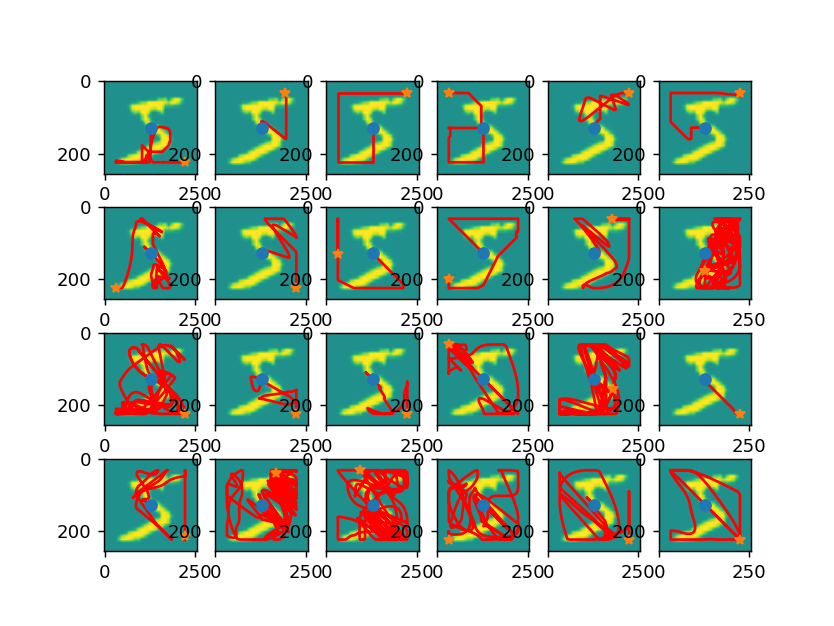

<IPython.core.display.Javascript object>


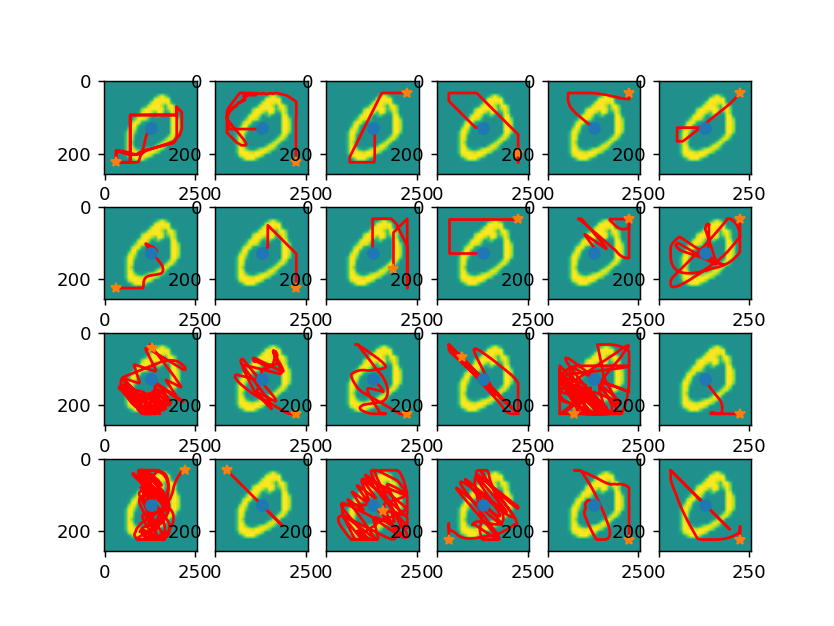

<IPython.core.display.Javascript object>


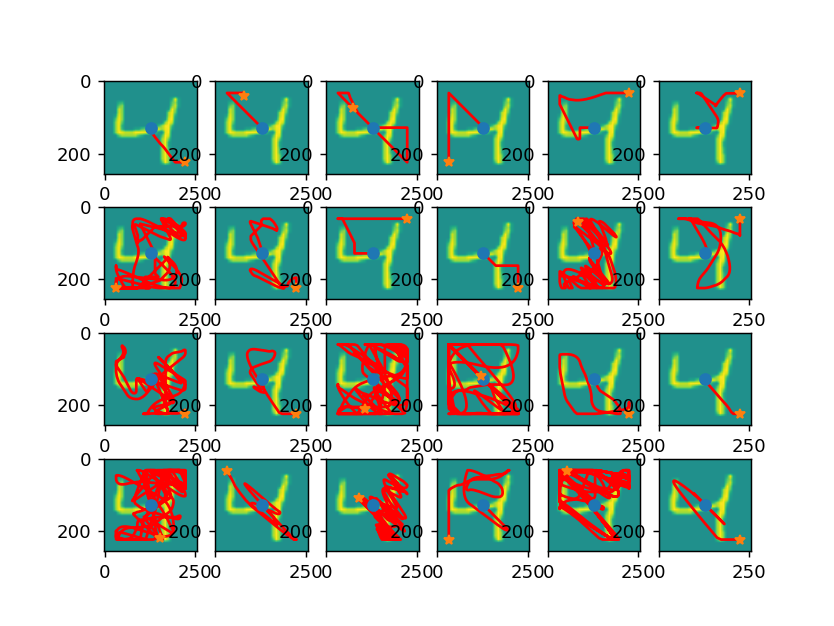

<IPython.core.display.Javascript object>


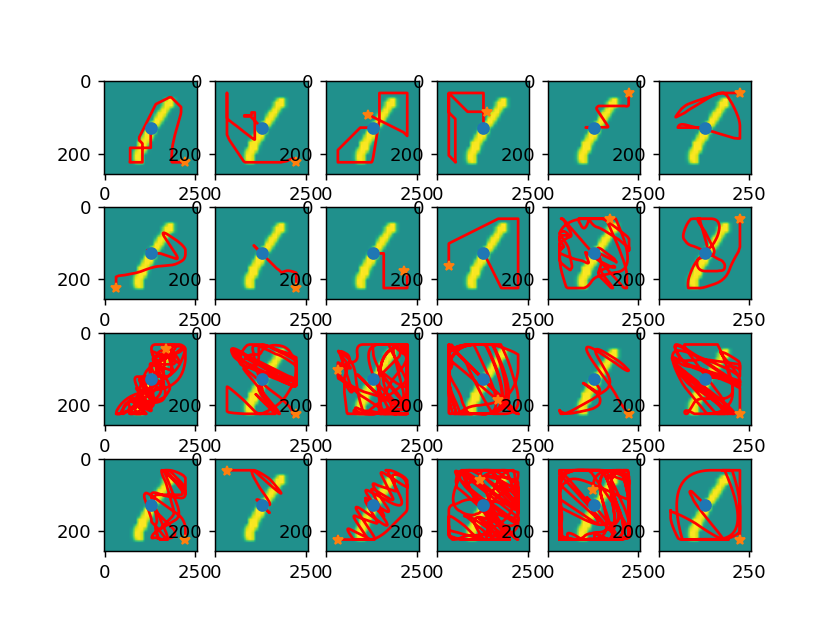

<IPython.core.display.Javascript object>


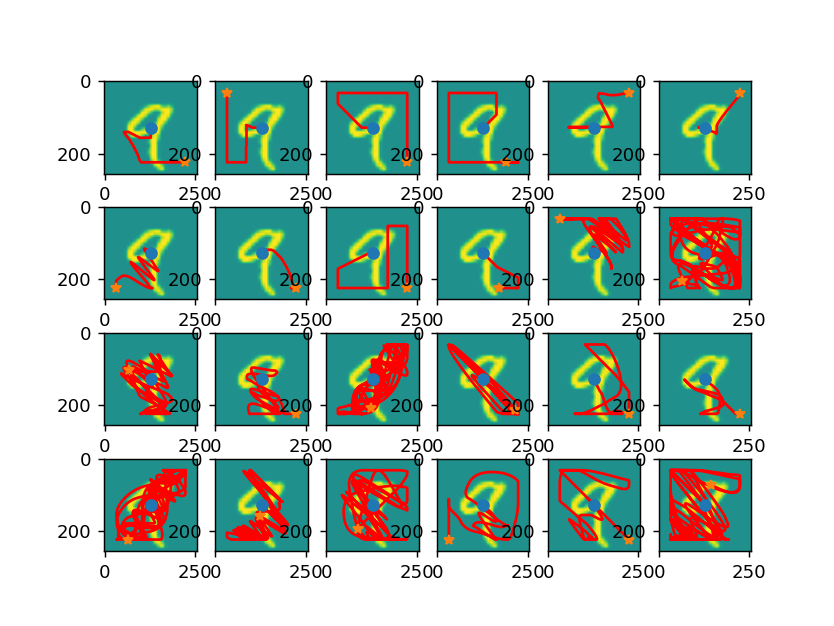

<IPython.core.display.Javascript object>


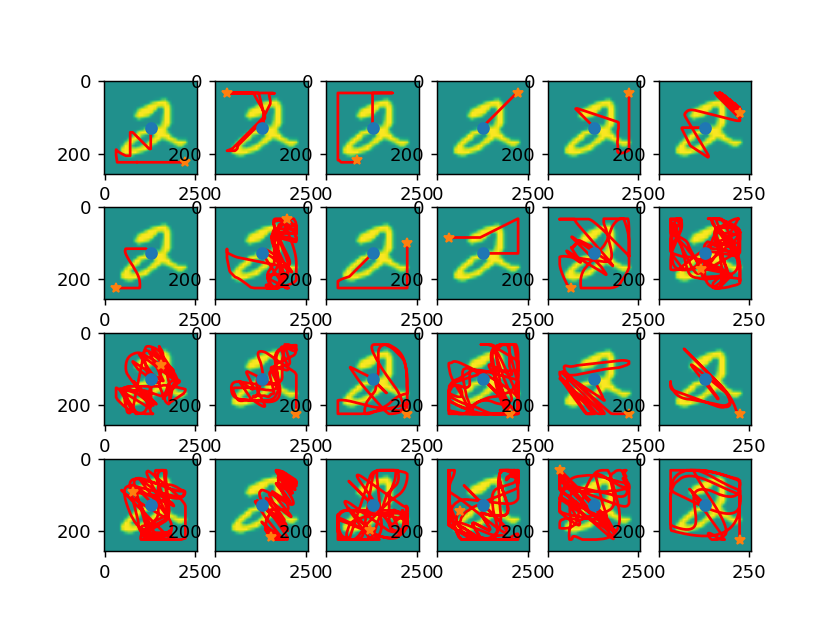

<IPython.core.display.Javascript object>


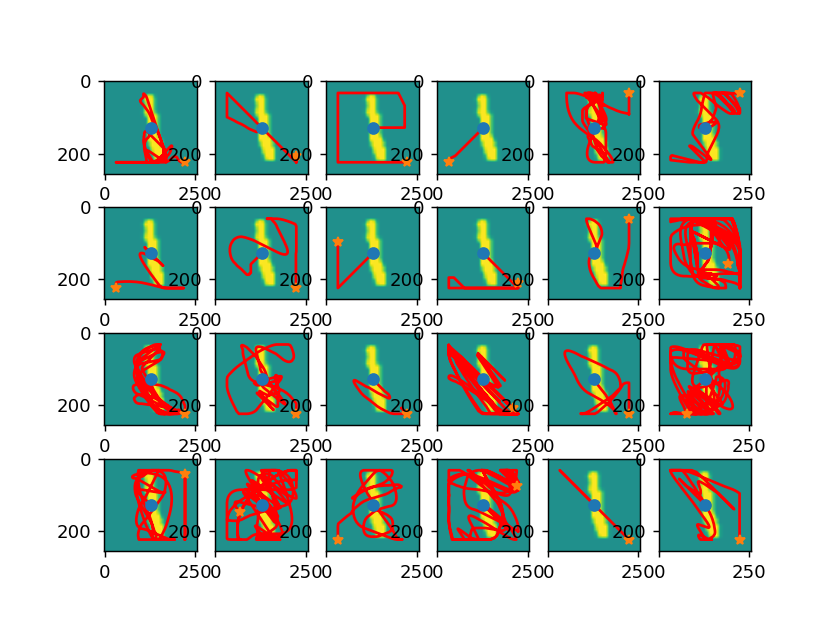

<IPython.core.display.Javascript object>


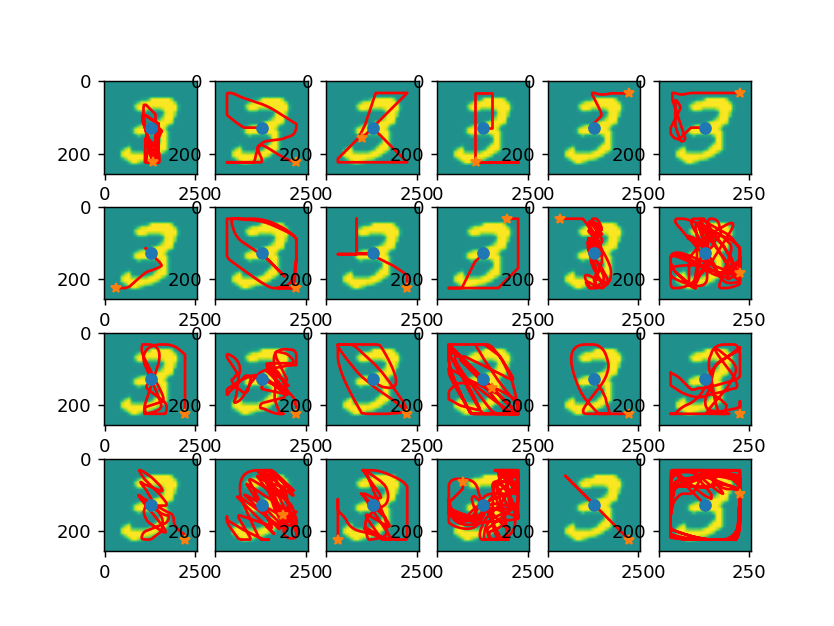

<IPython.core.display.Javascript object>


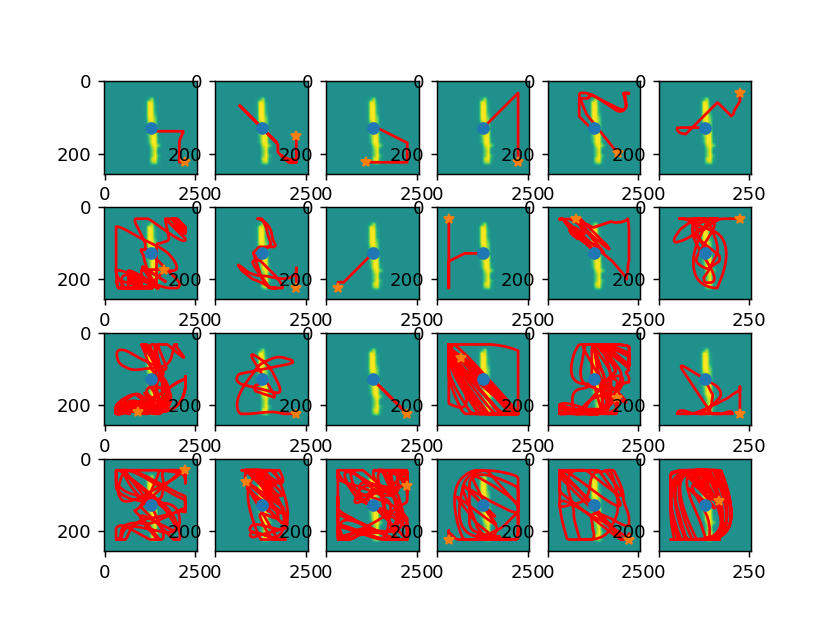

<IPython.core.display.Javascript object>


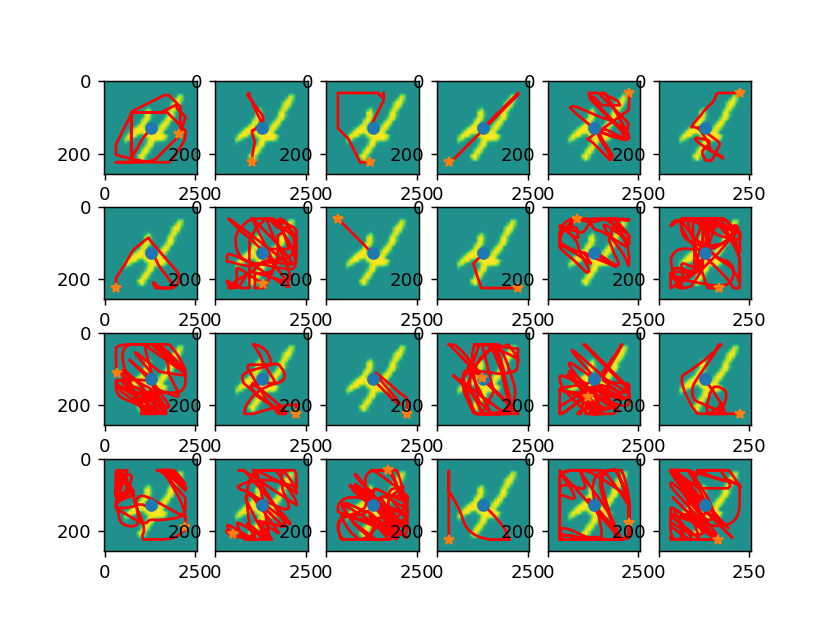

<IPython.core.display.Javascript object>


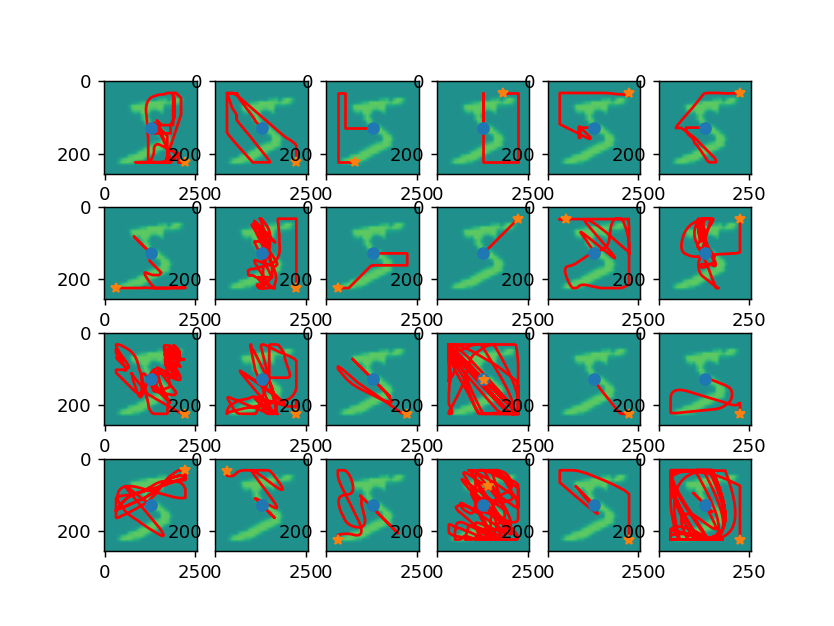

<IPython.core.display.Javascript object>


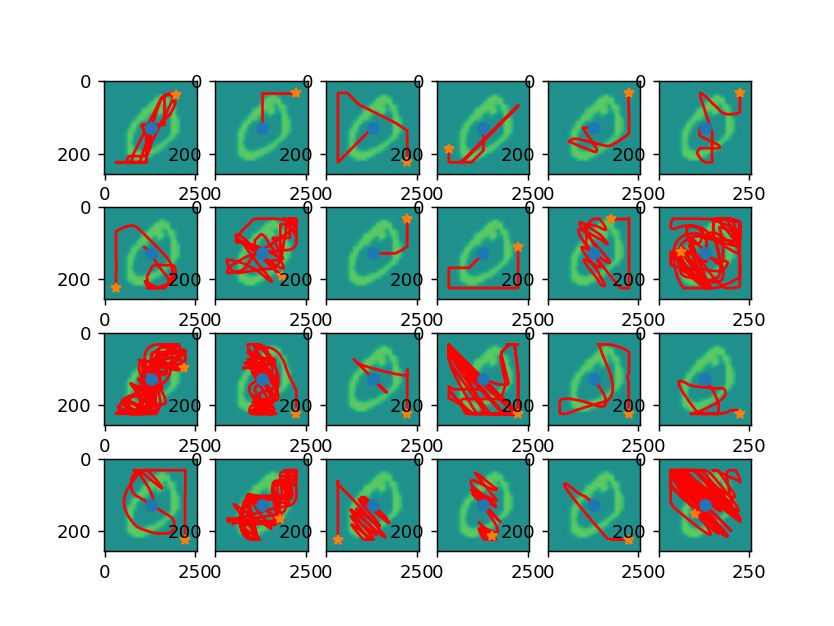

<IPython.core.display.Javascript object>


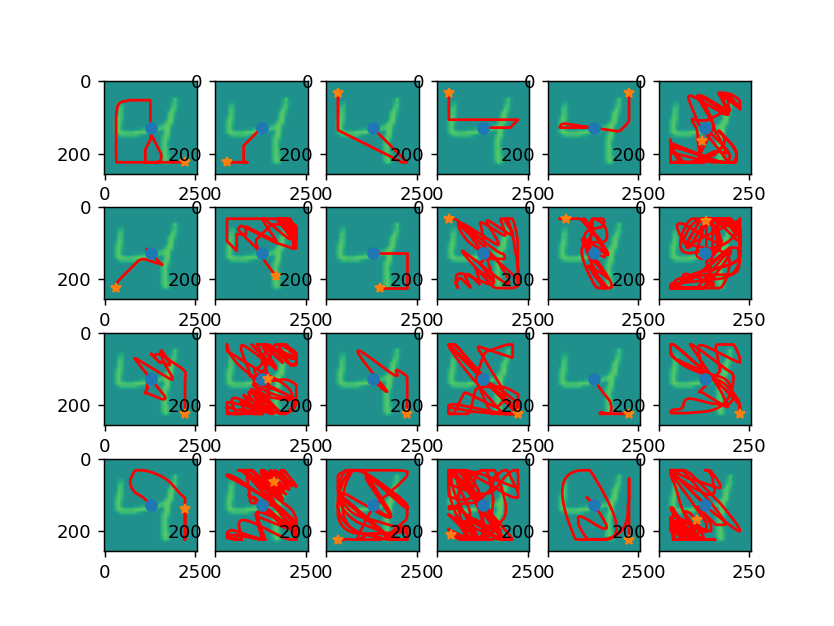

<IPython.core.display.Javascript object>


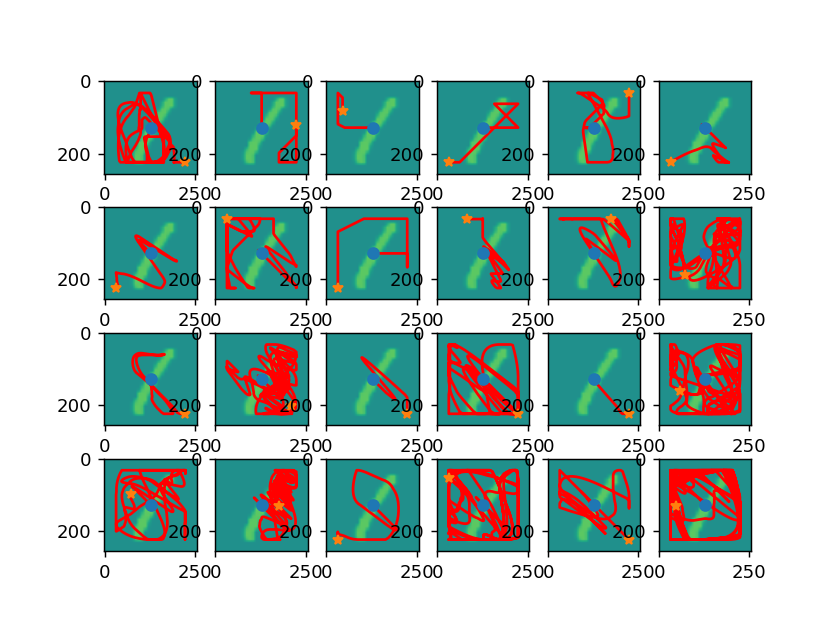

<IPython.core.display.Javascript object>


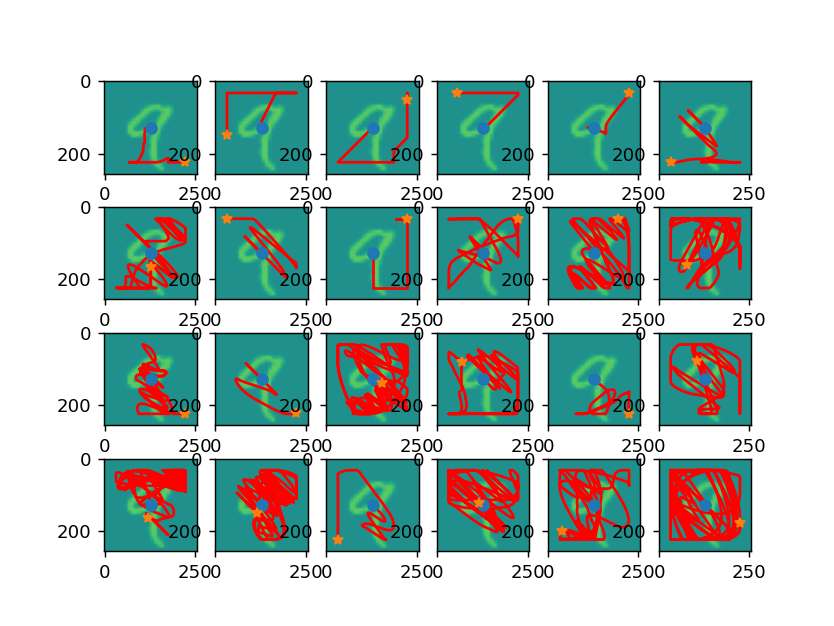

<IPython.core.display.Javascript object>


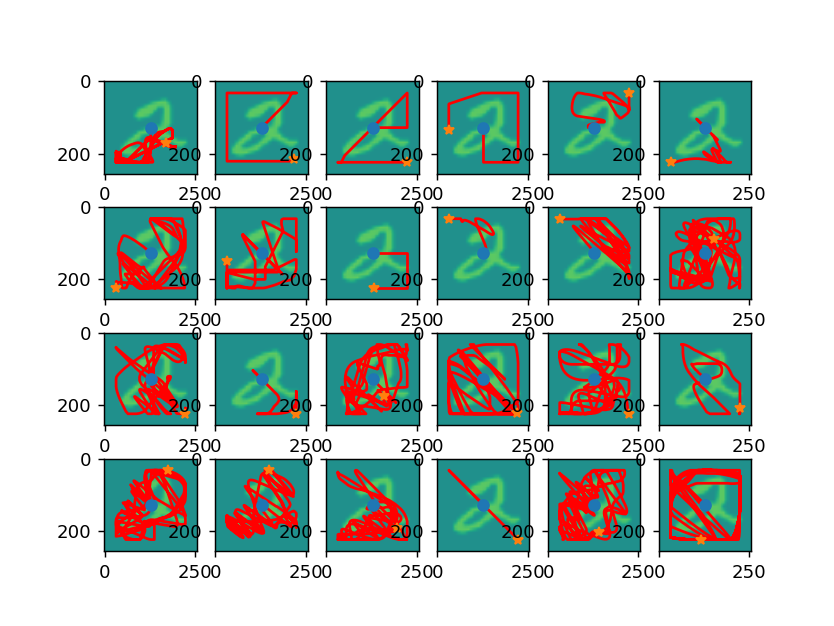

<IPython.core.display.Javascript object>


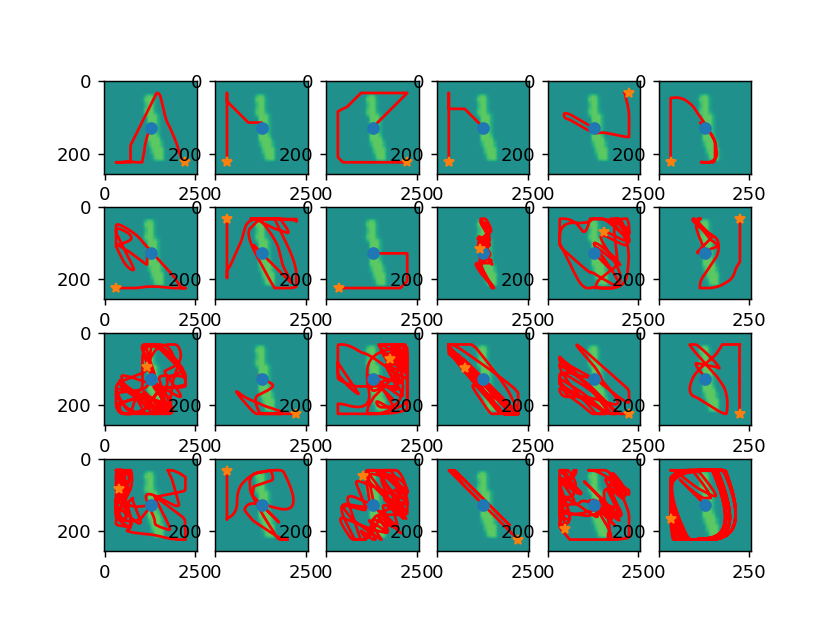

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


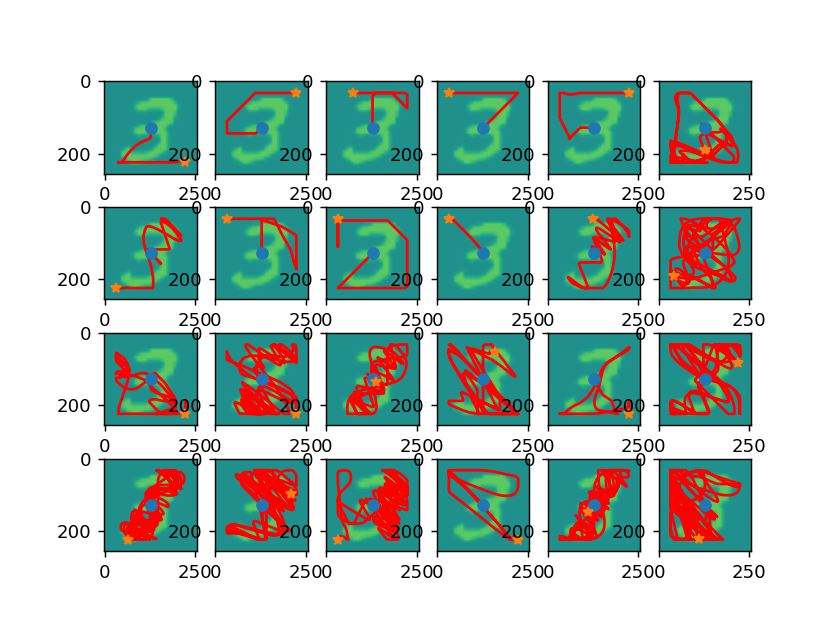

<IPython.core.display.Javascript object>


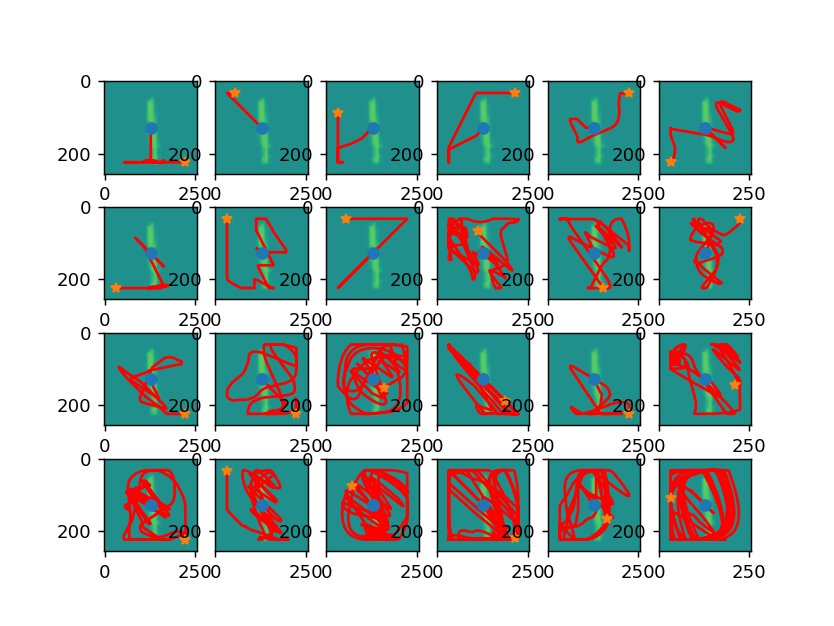

<IPython.core.display.Javascript object>


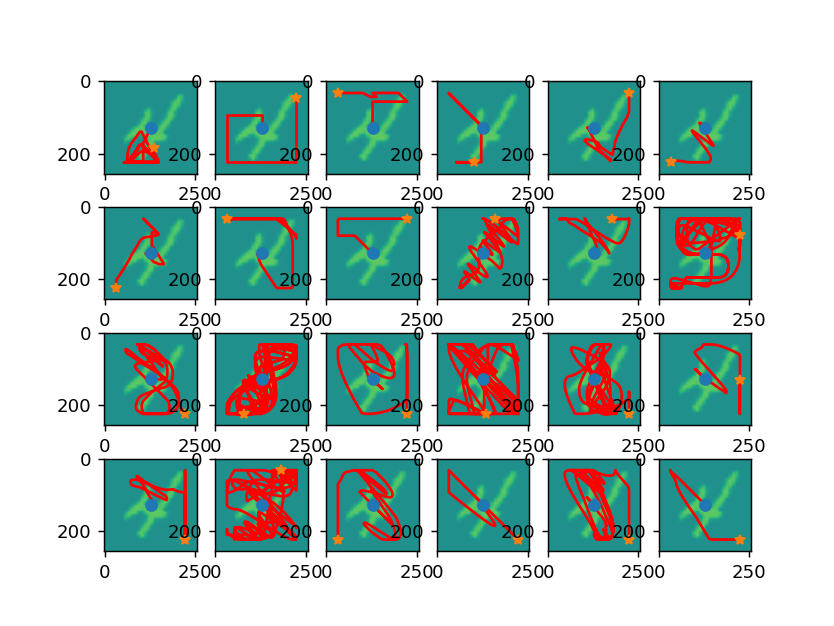

<IPython.core.display.Javascript object>


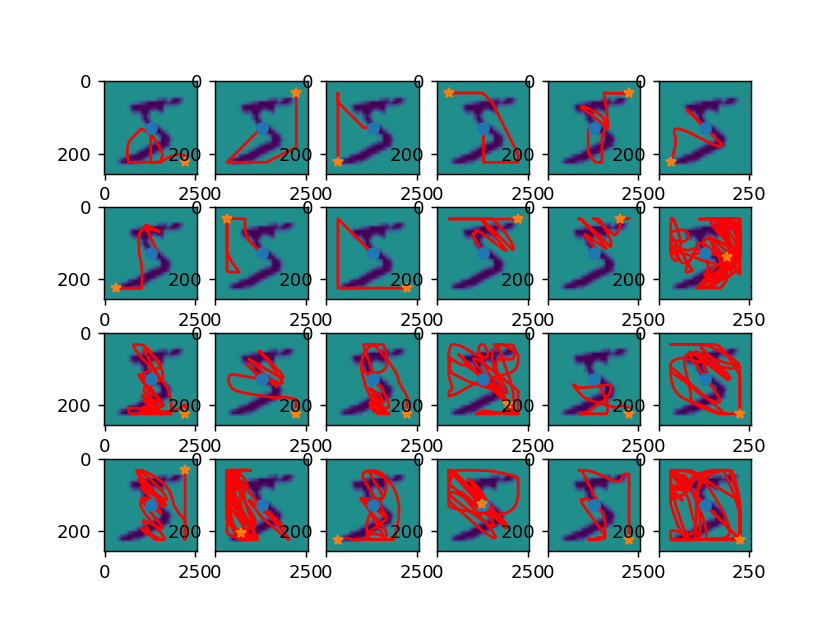

<IPython.core.display.Javascript object>


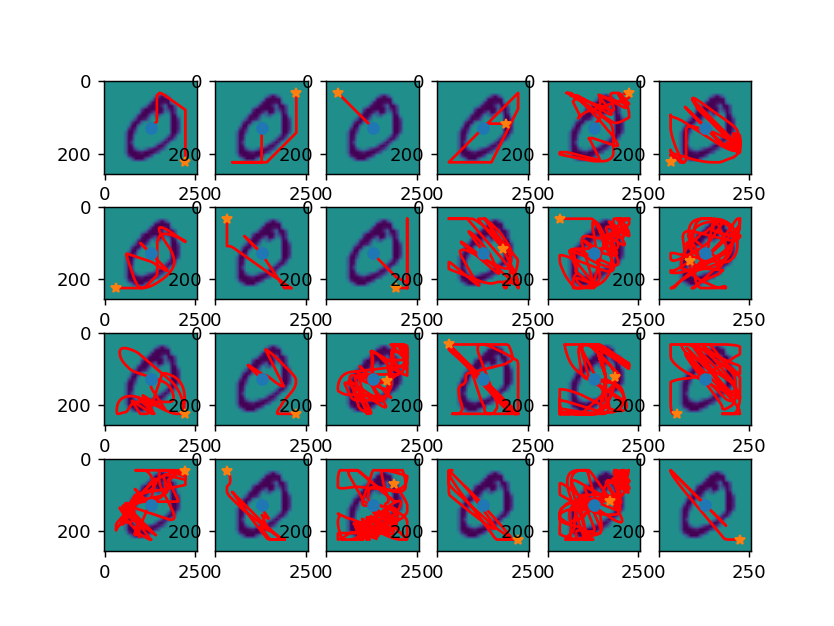

<IPython.core.display.Javascript object>


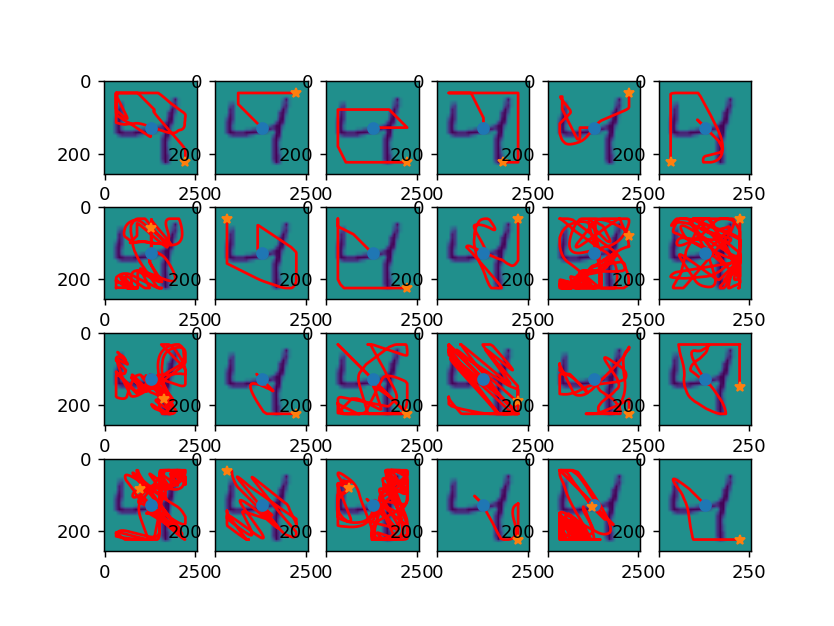

<IPython.core.display.Javascript object>


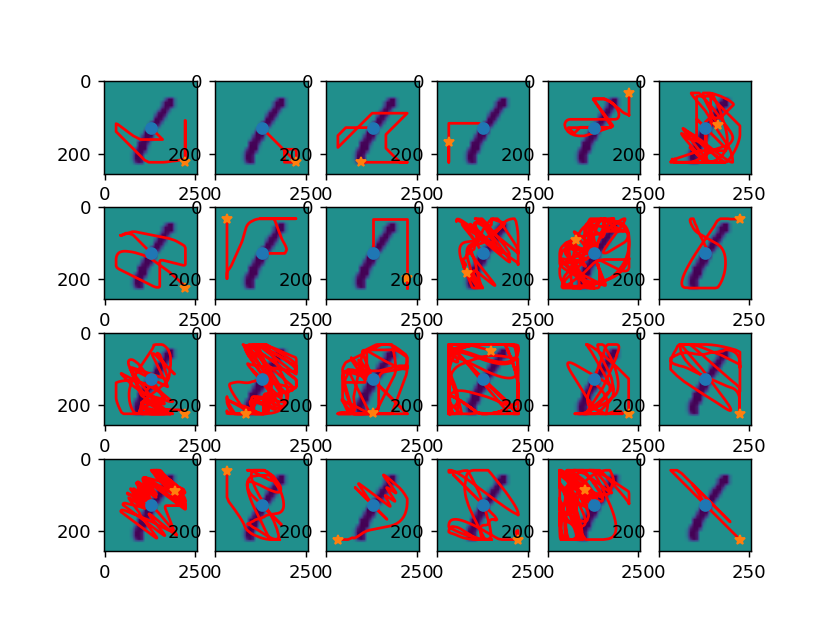

<IPython.core.display.Javascript object>


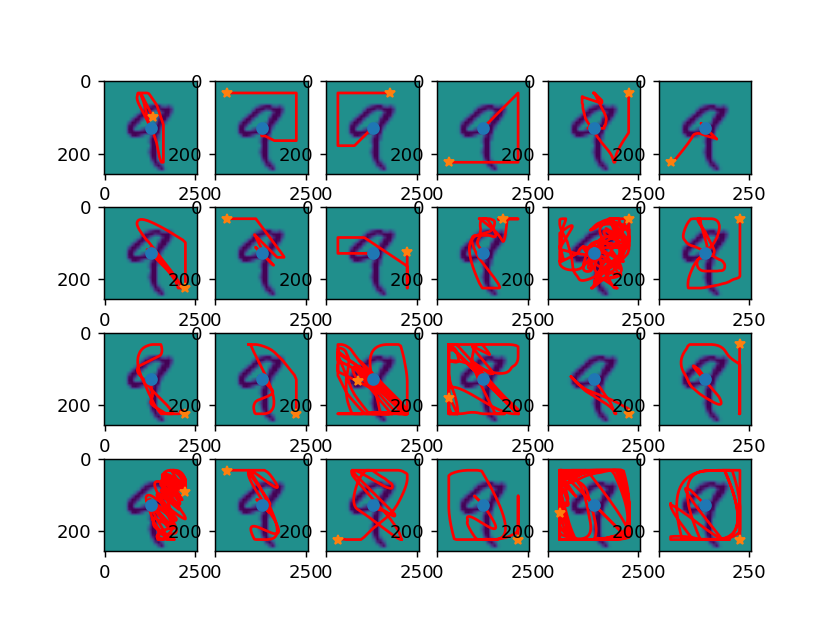

<IPython.core.display.Javascript object>


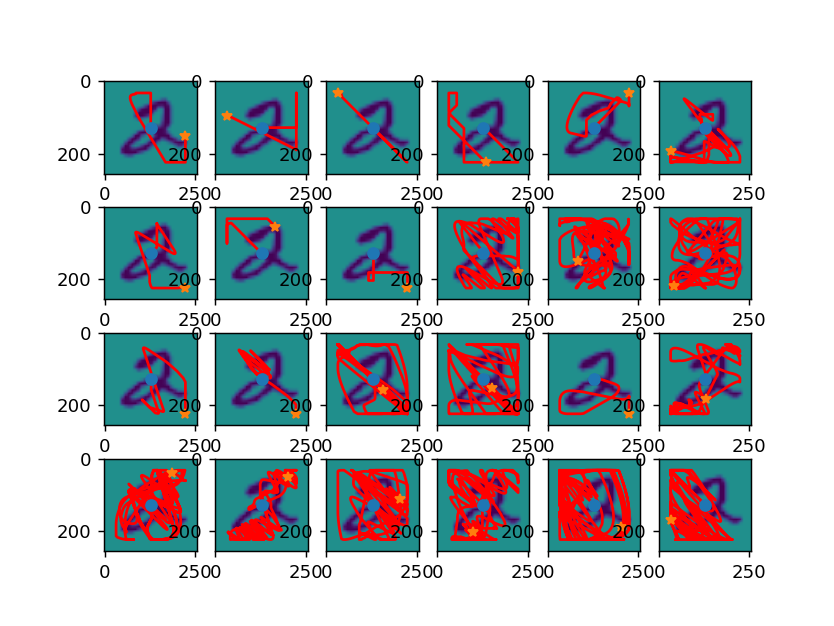

<IPython.core.display.Javascript object>


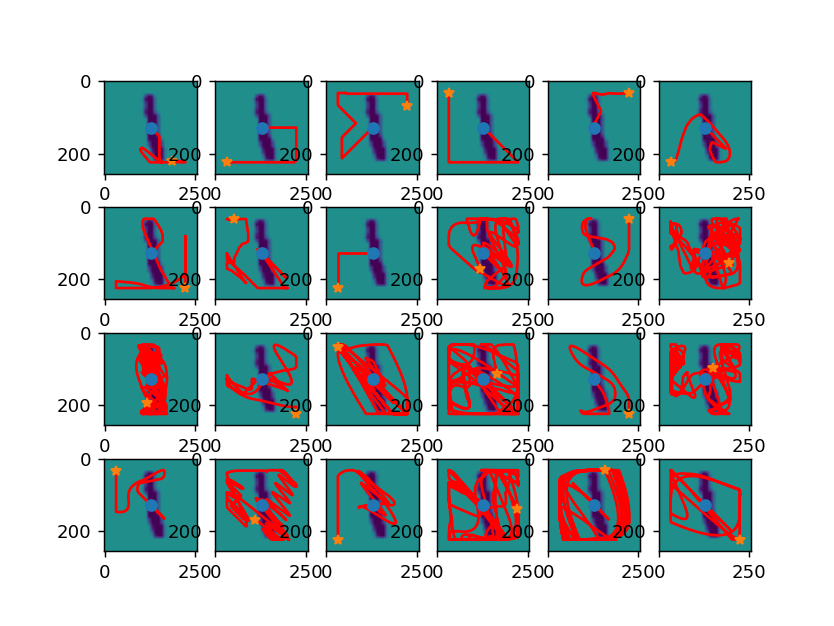

<IPython.core.display.Javascript object>


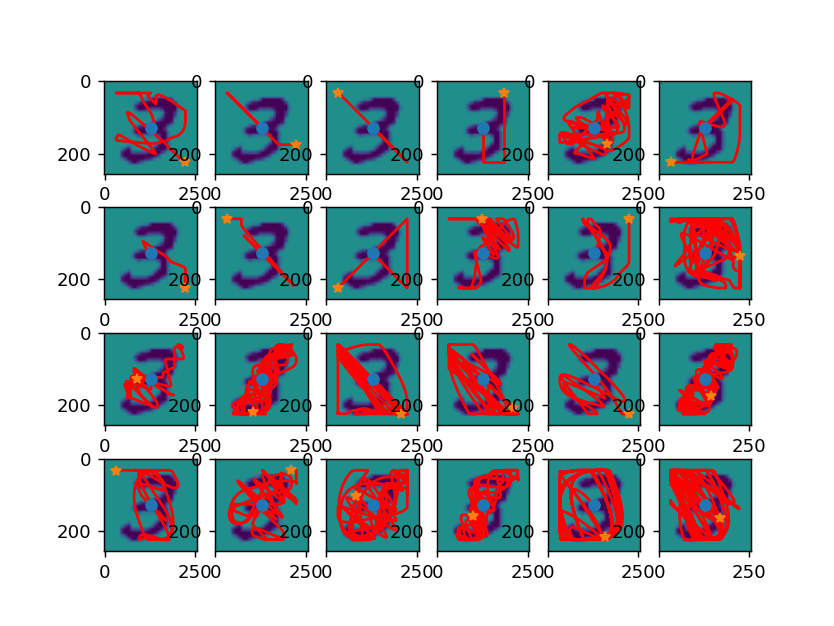

<IPython.core.display.Javascript object>


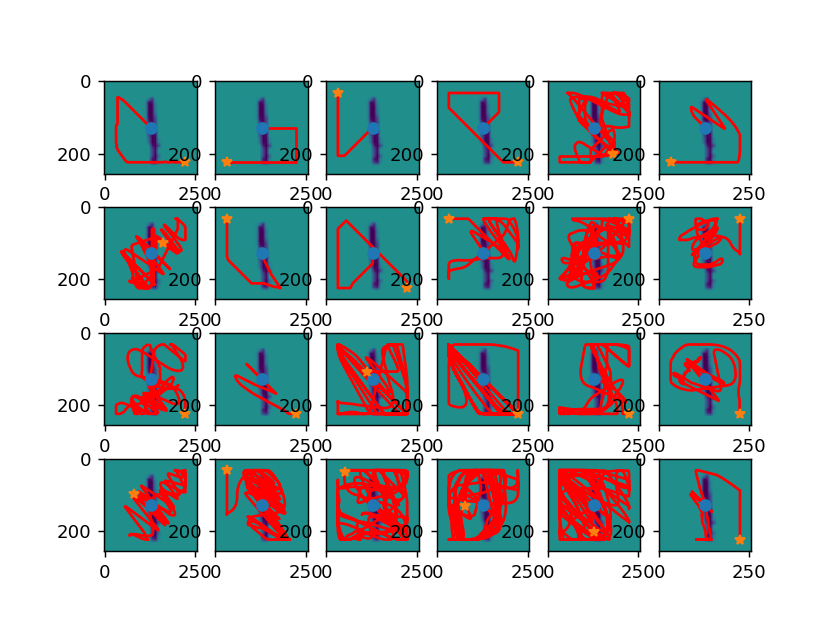

<IPython.core.display.Javascript object>


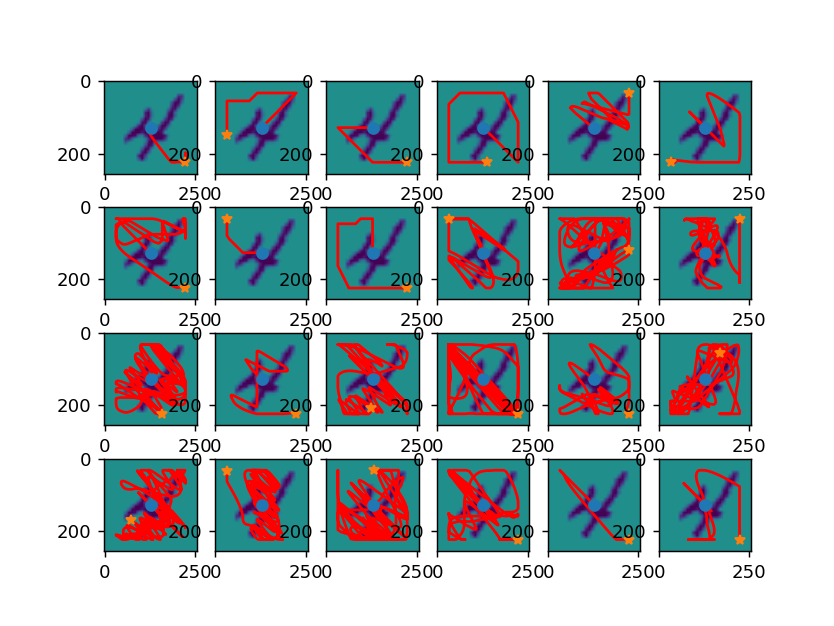

In [40]:
mm=len(recorders)//24
for imag_num in range(mm):
    plt.figure()
    for qq in range(24):
        recorder = recorders[mm*qq+imag_num]
        image = images[imag_num]
        plt.subplot(4,6,qq+1)
        plt.imshow(image,vmax=256,vmin=-256)
        plt.plot(32+np.array(recorder.records[0]),image.shape[0]-32-np.array(recorder.records[1]),'r-')
        plt.plot(32+np.array(recorder.records[0])[0],image.shape[0]-32-np.array(recorder.records[1])[0],'o')
        plt.plot(32+np.array(recorder.records[0])[-1],image.shape[0]-32-np.array(recorder.records[1])[-1],'*')

In [ ]:
sorted([(1,2),(6,1),(-1,30),(6,-0.5),(1,-100)])

<IPython.core.display.Javascript object>


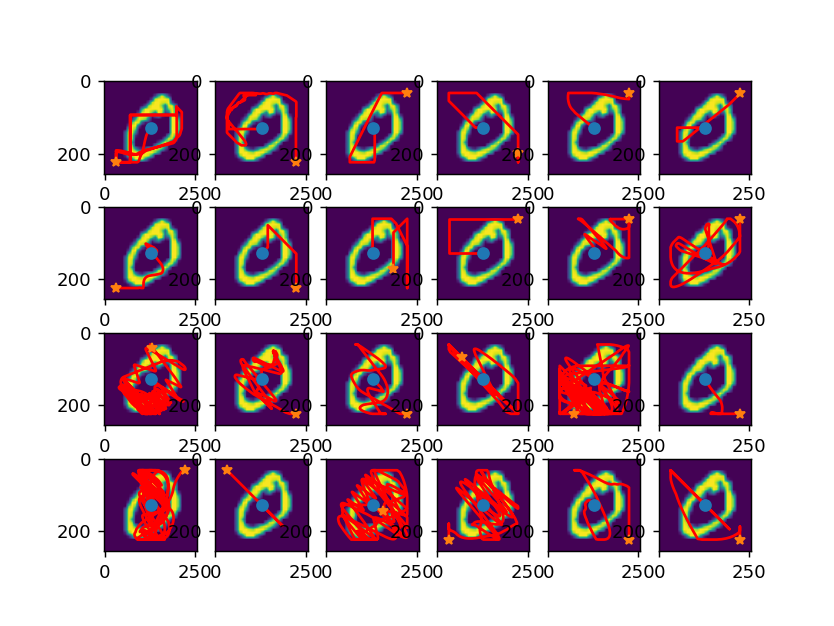

<IPython.core.display.Javascript object>


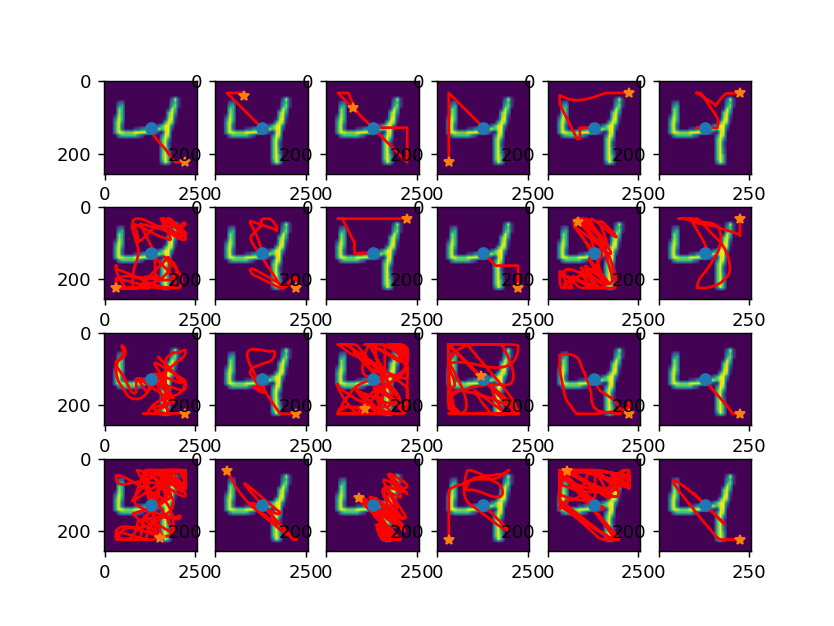

<IPython.core.display.Javascript object>


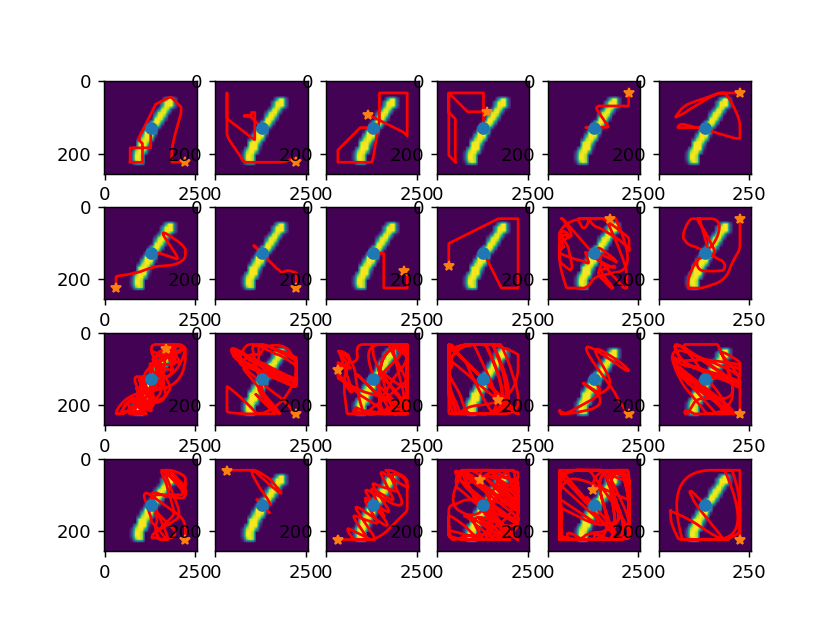

In [39]:
mm=len(recorders)//24
for imag_num in [1,2,3]: #range(mm):
#     plt.figure()
#     for qq in range(24):
#         recorder = recorders[mm*qq+imag_num]
#         image = images[imag_num]
#         plt.subplot(4,6,qq+1)
#         plt.hist(recorder.records[-1],bins=list(range(10)))
    plt.figure()
    for qq in range(24):
        recorder = recorders[mm*qq+imag_num]
        image = images[imag_num]
        plt.subplot(4,6,qq+1)
        plt.imshow(image,vmax=256,vmin=0)
        plt.plot(32+np.array(recorder.records[0]),image.shape[0]-32-np.array(recorder.records[1]),'r-')
        plt.plot(32+np.array(recorder.records[0])[0],image.shape[0]-32-np.array(recorder.records[1])[0],'o')
        plt.plot(32+np.array(recorder.records[0])[-1],image.shape[0]-32-np.array(recorder.records[1])[-1],'*')

In [ ]:
agent.hp.action_space

In [ ]:
all_act=[]

In [ ]:
for recorder in recorders:
    all_act +=(recorder.records[-1])

In [ ]:
plt.figure()
plt.hist(all_act,bins=list(range(10)))

In [16]:
len(nets_to_eval)

36

In [17]:
nets_to_eval

[0,
 9,
 7,
 10,
 11,
 5,
 21,
 26,
 15,
 25,
 19,
 6,
 4,
 13,
 20,
 35,
 17,
 27,
 3,
 29,
 8,
 18,
 16,
 28,
 23,
 30,
 12,
 34,
 22,
 33,
 2,
 31,
 1,
 32,
 14,
 24]

In [18]:
run_dirs

['saved_runs/run_syclop_generic2.py_noname_156387511022903328/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022917376/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022944768/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022950496/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022951328/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022961792/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022968160/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022977504/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022977952/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022986432/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022991296/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022995680/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022999136/',
 'saved_runs/run_syclop_generic2.py_noname_156387511022999392/',
 'saved_runs/run_syclop_generic2.py_noname_156387511023002688/',
 'saved_runs/run_syclop_g

In [20]:
for ff,file in enumerate(run_dirs):
    try:
        with open(file+'/hp.pkl','rb') as f:
            hp = pickle.load(f)
        if 'reward' in hp.__dict__.keys():
            print(file)
            print(ff,'---',hp.description) #,'---',hp.reward.relative_weights,hp.fading_mem)
#         tosort.append((hp.reward.relative_weights[-1],hp.fading_mem,ff))
    except:
        pass

saved_runs/run_syclop_generic2.py_noname_156387511022903328/
0 --- mnist with contrast binary  +/-1, penalty for speed, flexible fading const
saved_runs/run_syclop_generic2.py_noname_156387511022917376/
1 --- mnist with contrast binary  +/-1, penalty for speed, flexible fading const
saved_runs/run_syclop_generic2.py_noname_156387511022944768/
2 --- mnist with contrast binary  +/-1, penalty for speed, flexible fading const
saved_runs/run_syclop_generic2.py_noname_156387511022950496/
3 --- mnist with contrast binary  +/-1, penalty for speed, flexible fading const
saved_runs/run_syclop_generic2.py_noname_156387511022951328/
4 --- mnist with contrast binary  +/-1, penalty for speed, flexible fading const
saved_runs/run_syclop_generic2.py_noname_156387511022961792/
5 --- mnist with contrast binary  +/-1, penalty for speed, flexible fading const
saved_runs/run_syclop_generic2.py_noname_156387511022968160/
6 --- mnist with contrast binary  +/-1, penalty for speed, flexible fading const
saved_

In [21]:
nets_to_eval

[0,
 9,
 7,
 10,
 11,
 5,
 21,
 26,
 15,
 25,
 19,
 6,
 4,
 13,
 20,
 35,
 17,
 27,
 3,
 29,
 8,
 18,
 16,
 28,
 23,
 30,
 12,
 34,
 22,
 33,
 2,
 31,
 1,
 32,
 14,
 24]

In [24]:
recorders_orig=copy.copy(recorders)

In [23]:
import copy

In [36]:
recorders=[]

In [37]:
for nn,rr in enumerate(recorders_orig):
    if nets_to_eval[nn%36]<24:
        recorders.append(rr)


In [38]:
len(recorders)

720

In [33]:
1080*2/3

720.0

In [35]:
sum(np.array(nets_to_eval)<24)

24